In [209]:
import sys
sys.path.append("..")

In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
from datasets import *

In [211]:
graduationDistrictDf = get_Graduation(filterBy='district')

In [212]:
list(graduationDistrictDf)

['District',
 'Cohort Year',
 'Cohort Category',
 'Total Cohort #',
 'Total Grads #',
 'Total Grads % of cohort',
 'Total Regents #',
 'Total Regents % of cohort',
 'Total Regents % of grads',
 'Advanced Regents #',
 'Advanced Regents % of cohort',
 'Advanced Regents % of grads',
 'Regents w/o Advanced #',
 'Regents w/o Advanced      % of cohort',
 'Regents w/o Advanced           % of grads',
 'Local #',
 'Local % of cohort',
 'Local % of grads',
 'Still Enrolled #',
 'Still Enrolled % of cohort',
 'Dropped Out #',
 'Dropped Out % of cohort']

In [213]:
graduationDistrictDf.isna().sum()

District                                     0
Cohort Year                                  0
Cohort Category                              0
Total Cohort #                               0
Total Grads #                                0
Total Grads % of cohort                      0
Total Regents #                              0
Total Regents % of cohort                    0
Total Regents % of grads                     0
Advanced Regents #                           0
Advanced Regents % of cohort                 0
Advanced Regents % of grads                  0
Regents w/o Advanced #                       0
Regents w/o Advanced      % of cohort        0
Regents w/o Advanced           % of grads    0
Local #                                      0
Local % of cohort                            0
Local % of grads                             0
Still Enrolled #                             0
Still Enrolled % of cohort                   0
Dropped Out #                                0
Dropped Out %

## Taking all year into account

In [214]:
importantColumns = ['District','Cohort Year','Total Cohort #','Total Grads #','Total Grads % of cohort',
                   'Still Enrolled #','Still Enrolled % of cohort','Dropped Out #','Dropped Out % of cohort'] 
graduationDistrictDfFilter = graduationDistrictDf[importantColumns]



In [215]:
graduationDistrictDfFilter['Cohort Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011])

Do high school graduation rates with district demographic

## Which district has the highest graduation and highest drop out?

## Graduation Rate Analysis

In [216]:
graduationRateFiltered = graduationDistrictDfFilter.groupby('District',as_index=False).mean() \
.sort_values(['Total Grads % of cohort'],ascending=False)

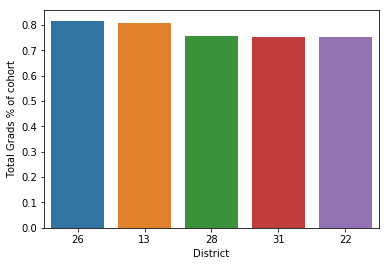

In [217]:
NUM_OF_DISTRICT_BAR_PLOT = 5
sns.barplot(x=graduationRateFiltered[:NUM_OF_DISTRICT_BAR_PLOT]['District'],
            y=graduationRateFiltered[:NUM_OF_DISTRICT_BAR_PLOT]['Total Grads % of cohort'],
            order=graduationRateFiltered[:NUM_OF_DISTRICT_BAR_PLOT]['District'])

### What are some schools in District 26?

In [218]:
get_SchoolsByDistrict(26)

['BENJAMIN N. CARDOZO HIGH SCHOOL',
 'FRANCIS LEWIS HIGH SCHOOL',
 'MARTIN VAN BUREN HIGH SCHOOL',
 'BAYSIDE HIGH SCHOOL',
 'QUEENS HIGH SCHOOL OF TEACHING, LIBERAL ARTS AND THE SCIENCES']

## Narrowing it down by schools

Sometime a really good school may move the average up for a poor school as well within the district.

In [219]:
schoolDf = get_Graduation(filterBy='school')
#graduationSchoolDf[graduationSchoolDf['School']=='BENJAMIN N. CARDOZO HIGH SCHOOL']

In [220]:
schoolDf = schoolDf[schoolDf!='s'].dropna()
#graduationSchoolDf.groupby(['School','Cohort Year','Total Grads % of cohort'],as_index=False).mean()

/Users/shravan/Desktop/NYCHS-Data-Analysis/shravan/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [221]:
list(schoolDf)

['DBN',
 'School',
 'Cohort Year',
 'Cohort Category',
 'Total Cohort #',
 'Total Grads #',
 'Total Grads   % of cohort',
 'Total Regents #',
 'Total Regents    % of cohort',
 'Total Regents   % of grads',
 'Advanced Regents #',
 'Advanced   Regents   % of cohort',
 'Advanced Regents    % of grads',
 'Regents w/o Advanced  #',
 'Regents w/o Advanced                          % of cohort',
 'Regents w/o Advanced        % of grads',
 'Local  #',
 'Local   % of cohort',
 'Local   % of grads',
 'Still Enrolled #',
 'Still Enrolled    % of cohort',
 'Dropped Out  #',
 'Dropped Out    % of cohort']

In [222]:
tmpCol = ['DBN','School','Cohort Year','Total Grads   % of cohort','Dropped Out    % of cohort']
schoolDf=schoolDf[tmpCol]

In [223]:
schoolDf['Total Grads   % of cohort'] = pd.to_numeric(
    schoolDf['Total Grads   % of cohort'].str.replace('%', ''))
schoolDf['Dropped Out    % of cohort'] = pd.to_numeric(
    schoolDf['Dropped Out    % of cohort'].str.replace('%', ''))
schoolDf['Cohort Year'] = pd.to_numeric(
    schoolDf['Cohort Year'])

In [224]:
schoolFiltered = schoolDf.groupby(['DBN','School','Cohort Year'],as_index=False).agg({
    'Total Grads   % of cohort':np.mean,'Dropped Out    % of cohort':np.mean
})

In [225]:
schoolFiltered.head(10)

,DBN,School,Cohort Year,Total Grads % of cohort,Dropped Out % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,2004,69.233333,16.433333
1,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,2005,69.500000,15.450000
2,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,2006,59.160000,22.120000
3,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,2007,62.560000,14.560000
4,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,2008,55.280000,19.780000
5,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,2009,64.780000,14.740000
6,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,2010,45.925000,30.300000
7,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,2011,63.000000,9.600000
8,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2001,80.233333,11.466667
9,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2002,78.833333,4.500000


In [226]:
schoolFiltered = schoolDf.groupby('School',as_index=False).agg({
    'Total Grads   % of cohort':np.mean,'Dropped Out    % of cohort':np.mean
})

In [227]:
graduationRateFiltered = schoolFiltered.sort_values(['Total Grads   % of cohort'],ascending=False)

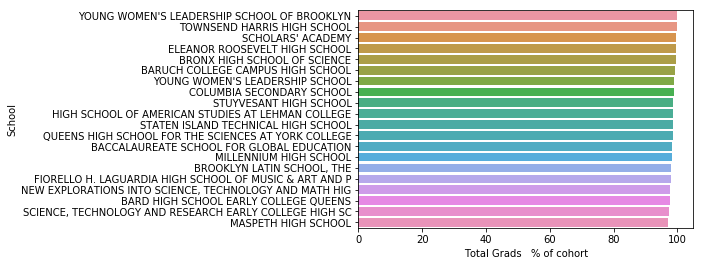

In [228]:
NUM_OF_DISTRICT_BAR_PLOT = 20
sns.barplot(y=graduationRateFiltered[:NUM_OF_DISTRICT_BAR_PLOT]['School'],
            x=graduationRateFiltered[:NUM_OF_DISTRICT_BAR_PLOT]['Total Grads   % of cohort'],
            order=graduationRateFiltered[:NUM_OF_DISTRICT_BAR_PLOT]['School'])

The result makes sense

## Drop Out Rate Analysis

In [229]:
dropOutRateFiltered = graduationDistrictDfFilter.groupby('District',as_index=False).mean() \
.sort_values(['Dropped Out % of cohort'],ascending=False)

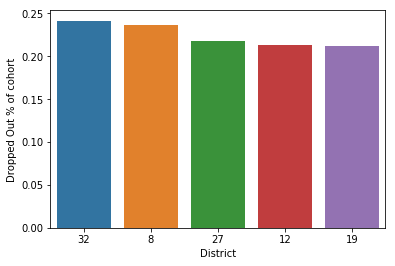

In [232]:
NUM_OF_DISTRICT_BAR_PLOT = 5
sns.barplot(x=dropOutRateFiltered[:NUM_OF_DISTRICT_BAR_PLOT]['District'],
            y=dropOutRateFiltered[:NUM_OF_DISTRICT_BAR_PLOT]['Dropped Out % of cohort'],
           order=dropOutRateFiltered[:NUM_OF_DISTRICT_BAR_PLOT]['District'])

### What are some schools in District 8?

In [201]:
get_SchoolsByDistrict(32)

['ACADEMY FOR ENVIRONMENTAL LEADERSHIP',
 'EBC HIGH SCHOOL FOR PUBLIC SERVICE–BUSHWICK',
 'BUSHWICK SCHOOL FOR SOCIAL JUSTICE',
 'ACADEMY OF URBAN PLANNING',
 'ALL CITY LEADERSHIP SECONDARY SCHOOL',
 'BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCELLENCE',
 'BUSHWICK COMMUNITY HIGH SCHOOL']

### Looking at Individual School

In [233]:
dropOutRateFiltered = schoolFiltered.sort_values(['Dropped Out    % of cohort'],ascending=False)

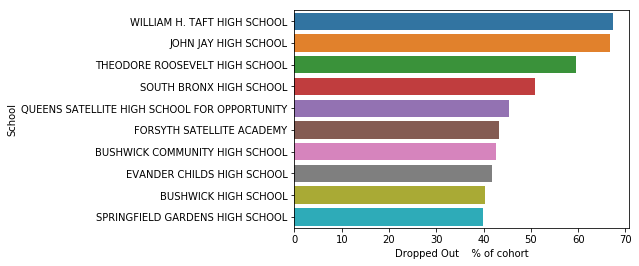

In [234]:
NUM_OF_DISTRICT_BAR_PLOT = 10
sns.barplot(y=dropOutRateFiltered[:NUM_OF_DISTRICT_BAR_PLOT]['School'],
            x=dropOutRateFiltered[:NUM_OF_DISTRICT_BAR_PLOT]['Dropped Out    % of cohort'],
           order=dropOutRateFiltered[:NUM_OF_DISTRICT_BAR_PLOT]['School'])

## Looking at Demographic

In [253]:
graduationDemographicDf= get_Graduation('demographic')

In [254]:
list(graduationDemographicDf)

['Cohort Year',
 'Cohort Category',
 'Demographic',
 '# Total Cohort',
 '# Total Grads',
 '% of cohort Total Grads',
 '# of cohort Total Grads',
 '% of cohort Total Regents',
 '% of grads  Total Regents',
 '# of grads  Total Regents',
 '% of cohort  Advanced Regents',
 '% of grads  Advanced Regents',
 '# of grads  Advanced Regents',
 '% of cohort  Regents w/o Advanced',
 '% of grads  Regents w/o Advanced',
 '# of grads  Regents w/o Advanced',
 '% of cohort Local',
 '% of grads Local',
 '# Still Enrolled',
 '% of cohort Still Enrolled',
 '# Dropped Out',
 '% of cohort Dropped Out']

In [255]:
graduationDemographicDf.head(1)

,Cohort Year,Cohort Category,Demographic,# Total Cohort,# Total Grads,% of cohort Total Grads,# of cohort Total Grads,% of cohort Total Regents,% of grads Total Regents,# of grads Total Regents,...,# of grads Advanced Regents,% of cohort Regents w/o Advanced,% of grads Regents w/o Advanced,# of grads Regents w/o Advanced,% of cohort Local,% of grads Local,# Still Enrolled,% of cohort Still Enrolled,# Dropped Out,% of cohort Dropped Out
0,2001,4 Year June,English Language Learner,10540,2791,26.5,992,9.0,35.5,315.0,...,677.0,6.4,24.3,1803,17.1,64.6,3895,37.0,3220,30.6


In [256]:
# graduationDemographicDf = graduationDemographicDf.groupby('Demographic',as_index=False).agg({
#     '% of cohort Total Grads':np.mean,'% of cohort Dropped Out':np.mean
# })

### Male vs Female Graduation Rate

In [257]:
maleGradRate = graduationDemographicDf[graduationDemographicDf['Demographic']=='Male']
femaleGradRate = graduationDemographicDf[graduationDemographicDf['Demographic']=='Female']

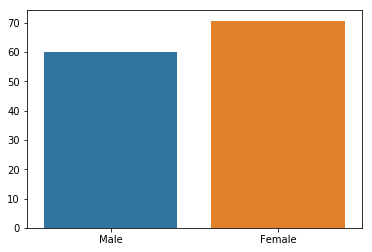

In [258]:
sns.barplot(x=['Male','Female'],
            y=[maleGradRate['% of cohort Total Grads'].mean(),femaleGradRate['% of cohort Total Grads'].mean()])

In [260]:
femaleGradRate['% of cohort Total Grads'].mean()-maleGradRate['% of cohort Total Grads'].mean()

10.73023255813952

More than 10% females graduated high school as compared to males from year 2001-2011.

### Drop Out and Graduation Rate for Different Demographics

In [261]:
graduationDemographicDf['Demographic'].unique()

array(['English Language Learner', 'Male', 'English Language Proficient',
       'Not Student with Disability', 'Student with Disability', 'Asian',
       'Black', 'Hispanic', 'White', 'Female'], dtype=object)

In [262]:
asianGraduationDemographicDf = graduationDemographicDfFilterBy2010[graduationDemographicDfFilterBy2010['Demographic']=='Asian']
blackGraduationDemographicDf = graduationDemographicDfFilterBy2010[graduationDemographicDfFilterBy2010['Demographic']=='Black']
hispanicGraduationDemographicDf = graduationDemographicDfFilterBy2010[graduationDemographicDfFilterBy2010['Demographic']=='Hispanic']
whiteGraduationDemographicDf = graduationDemographicDfFilterBy2010[graduationDemographicDfFilterBy2010['Demographic']=='White']


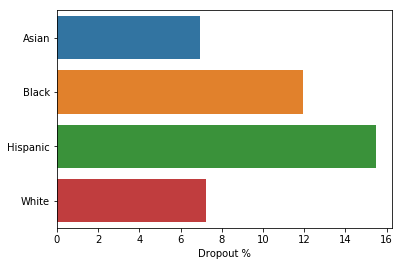

In [263]:
ax = sns.barplot(y=['Asian','Black','Hispanic','White'],
            x=[asianGraduationDemographicDf['% of cohort Dropped Out'].mean(),
               blackGraduationDemographicDf['% of cohort Dropped Out'].mean(),
               hispanicGraduationDemographicDf['% of cohort Dropped Out'].mean(),
               whiteGraduationDemographicDf['% of cohort Dropped Out'].mean()
              ]);
ax.set(xlabel='Dropout %');

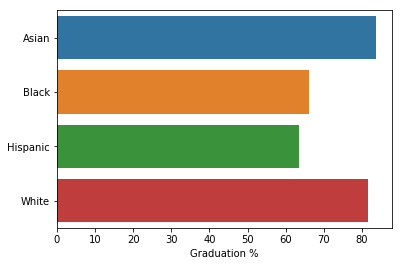

In [264]:
ax = sns.barplot(y=['Asian','Black','Hispanic','White'],
            x=[asianGraduationDemographicDf['% of cohort Total Grads'].mean(),
               blackGraduationDemographicDf['% of cohort Total Grads'].mean(),
               hispanicGraduationDemographicDf['% of cohort Total Grads'].mean(),
               whiteGraduationDemographicDf['% of cohort Total Grads'].mean()
              ]);
ax.set(xlabel='Graduation %');

## High School Rating Prediction 

### Preparing data

In [16]:
highSchoolGradeDf = get_SchoolGrade()

In [73]:
highSchoolGradeDf.dropna(inplace=True)

#### We can move all these simple data preprocessing into the datasets.py script

In [74]:
list(highSchoolGradeDf)

['DBN', 'DISTRICT', 'SCHOOL', '2009-2010 OVERALL GRADE']

In [75]:
satDf = get_SATScores()

In [76]:
satDf = satDf[satDf!='s']

In [77]:
satDf.dropna(inplace=True)

In [78]:
satDf.sat_critical_reading_avg_score = satDf.sat_critical_reading_avg_score.astype('int')
satDf.sat_math_avg_score = satDf.sat_math_avg_score.astype('int')
satDf.sat_writing_avg_score = satDf.sat_writing_avg_score.astype('int')

In [79]:
satDf['combined_score'] = satDf['sat_critical_reading_avg_score'].astype('int')+satDf['sat_math_avg_score']+satDf['sat_writing_avg_score']
satDf = satDf[['dbn','school_name','combined_score']]

In [80]:
mergedDf = pd.merge(highSchoolGradeDf,satDf,left_on='DBN',right_on='dbn')

In [81]:
mergedDf = mergedDf[['DBN','SCHOOL','combined_score','2009-2010 OVERALL GRADE']]

In [86]:
mergedDf.head()

,DBN,SCHOOL,combined_score,2009-2010 OVERALL GRADE
0,01M292,Henry Street School for International Studies,1122,D
1,01M448,University Neighborhood High School,1172,C
2,01M450,East Side Community School,1149,A
3,01M509,Marta Valle High School,1207,B
4,01M539,"New Explorations into Science, Technology and ...",1621,B


#### Training Preparation
- Merge Graduation Rate for each high school
- One hot encode Overall Grade 

### Training

- Plot error 

### Testing

- Plot accuracy graph
- Hyperparameter search 

## TODO Plan:  
- Connect Demographic to SAT Score datasets
- High School Grading prediction based on Graduation rate/ attendance/ SAT scores 


https://data.cityofnewyork.us/Education/2009-2010-School-Progress-Reports-All-Schools/ffnc-f3aa

In [5]:
tmp = get_SATScores('2015')

In [6]:
tmp

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,...,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:35 PM,416.0,1.7%,3.1%,5.5%,88.9%,613.0,453.0,463.0,95.9%
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,...,3:30 PM,255.0,3.9%,24.4%,56.6%,13.2%,410.0,406.0,381.0,59.7%
7,01M696,Bard High School Early College,Manhattan,M097,525 East Houston Street,Manhattan,NY,10002,40.71896,-73.97607,...,3:50 PM,545.0,45.3%,17.2%,18.7%,17.1%,634.0,641.0,639.0,70.8%
8,02M305,Urban Assembly Academy of Government and Law,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:45 PM,329.0,2.7%,41.9%,49.2%,5.8%,389.0,395.0,381.0,80.8%
9,01M509,Marta Valle High School,Manhattan,M025,145 Stanton Street,Manhattan,NY,10002,40.72057,-73.98567,...,3:30 PM,363.0,2.5%,39.9%,51.2%,5.8%,438.0,413.0,394.0,35.6%


In [5]:
get_SchoolsByDistrict(22)

['MIDWOOD HIGH SCHOOL',
 'JAMES MADISON HIGH SCHOOL',
 'SHEEPSHEAD BAY HIGH SCHOOL',
 'LEON M. GOLDSTEIN HIGH SCHOOL FOR THE SCIENCES',
 'BROOKLYN COLLEGE ACADEMY']